In [1]:
import ogr
import os

### Setup a shapefile for our use

In [2]:
shapefile = os.path.join('data','WBDHU8.shp')

### Open the shapefile using ogr

A simple demonstration of opening a shapefile using GDAL/OGR

In [3]:
shp_source = ogr.Open(shapefile)
shp_layer = shp_source.GetLayer()

### Get all the attributes in the shapefile

In [4]:
layerDefinition = shp_layer.GetLayerDefn()
for i in range(layerDefinition.GetFieldCount()):
    print(layerDefinition.GetFieldDefn(i).GetName())

OBJECTID
TNMID
MetaSource
SourceData
SourceOrig
SourceFeat
LoadDate
GNIS_ID
AreaAcres
AreaSqKm
States
HUC8
Name
Shape_Leng
Shape_Area


### Print data about a specific attribute

Filter the data and print values of those objects which passed

In [5]:
shp_layer.SetAttributeFilter ( "AreaAcres > 900000" )
for feat in shp_layer:
    print(f'{feat.GetFieldAsString("HUC8")} has {feat.GetFieldAsInteger("AreaAcres")} acres of area')

17040213 has 1403762 acres of area
16020309 has 1447003 acres of area
17010304 has 1181341 acres of area
17040206 has 1382053 acres of area
17040208 has 1073425 acres of area
17040209 has 2150407 acres of area
17040212 has 1631428 acres of area
17040218 has 1570309 acres of area
17040219 has 917743 acres of area
17050101 has 1332454 acres of area
17050124 has 1078280 acres of area
17060201 has 1551692 acres of area
17060203 has 1165976 acres of area
17060205 has 961137 acres of area
17060207 has 1096076 acres of area
17060306 has 1507839 acres of area
17010104 has 2396944 acres of area
17050103 has 1498752 acres of area
17050107 has 956880 acres of area
17010204 has 1270134 acres of area
17010205 has 1828999 acres of area
17010213 has 1495424 acres of area
17010101 has 2356690 acres of area
17050102 has 2162002 acres of area
17050104 has 1371846 acres of area
17050105 has 1200044 acres of area
17040210 has 943884 acres of area
17010216 has 1045801 acres of area
17060107 has 933737 acre

## Simplify Things With Geopandas

Ok, so we can read the data in the shapefile using gdal's ogr driver. It works, but it's not really elegant. Enter GeoPandas. The awesome processing power of pandas made ready to work with geospatial data.

### Load the data to a geodataframe and explore the data

use [read_file](https://geopandas.org/reference/geopandas.read_file.html) to get the shapefile into a [GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe)

In [6]:
import geopandas as gpd
gdf = gpd.read_file(shapefile)
print (gdf)

    OBJECTID                                   TNMID MetaSource SourceData  \
0          1  {57622894-1DC6-4014-8970-93A91B89B55E}       None       None   
1          2  {01C57E81-D098-4902-A2FE-5C1288E42BC8}       None       None   
2          3  {9A190882-951A-4D46-9BB3-BDBC031ADB45}       None       None   
3          4  {08DCF3AF-261F-46A9-9628-0F17C5823D2A}       None       None   
4          5  {8C62C2E3-C5AF-4345-8D28-837F9C70B5B2}       None       None   
..       ...                                     ...        ...        ...   
87        88  {D8526624-0926-421A-B811-382F7F6D65E3}       None       None   
88        89  {505FFE08-4104-4140-AC9C-D1CDF623BE15}       None       None   
89        90  {D856EF1B-AED2-49EC-94B5-1D81CA0FBDFB}       None       None   
90        91  {85B4DAAE-3F7E-4E1A-9176-1FE9554DCD8B}       None       None   
91        92  {05F97963-7BF4-40BB-9668-F40029C826E5}       None       None   

   SourceOrig SourceFeat    LoadDate  GNIS_ID   AreaAcres  Area

In [7]:
gdf.head()

,OBJECTID,TNMID,MetaSource,SourceData,SourceOrig,SourceFeat,LoadDate,GNIS_ID,AreaAcres,AreaSqKm,States,HUC8,Name,Shape_Leng,Shape_Area,geometry
0,1,{57622894-1DC6-4014-8970-93A91B89B55E},None,None,None,None,2013-01-18,0,1403762.40,5680.83,"ID,NV",17040213,Salmon Falls,5.365378,0.616993,"POLYGON ((-114.92392 42.72045, -114.92206 42.7..."
1,2,{01C57E81-D098-4902-A2FE-5C1288E42BC8},None,None,None,None,2012-06-11,0,801177.90,3242.25,"ID,UT",16010204,Lower Bear-Malad,4.732371,0.351788,"POLYGON ((-112.44531 42.54989, -112.44521 42.5..."
2,3,{9A190882-951A-4D46-9BB3-BDBC031ADB45},None,None,None,None,2012-06-11,0,1447003.99,5855.82,"ID,UT",16020309,Curlew Valley,5.594843,0.635021,"POLYGON ((-112.66223 42.47056, -112.66220 42.4..."
3,4,{08DCF3AF-261F-46A9-9628-0F17C5823D2A},None,None,None,None,2012-06-11,0,810819.31,3281.27,"ID,UT",16010201,Bear Lake,4.380214,0.358029,"POLYGON ((-111.64623 42.85187, -111.64585 42.8..."
4,5,{8C62C2E3-C5AF-4345-8D28-837F9C70B5B2},None,None,None,None,2013-01-18,0,573785.43,2322.03,"ID,MT",17010301,Upper Coeur d'Alene,2.754734,0.278619,"POLYGON ((-116.23330 48.06887, -116.23237 48.0..."


### Searching and filtering is as simple as using Pandas functionality

In [8]:
gdf.loc[gdf['AreaAcres'] > 90000]

,OBJECTID,TNMID,MetaSource,SourceData,SourceOrig,SourceFeat,LoadDate,GNIS_ID,AreaAcres,AreaSqKm,States,HUC8,Name,Shape_Leng,Shape_Area,geometry
0,1,{57622894-1DC6-4014-8970-93A91B89B55E},None,None,None,None,2013-01-18,0,1403762.40,5680.83,"ID,NV",17040213,Salmon Falls,5.365378,0.616993,"POLYGON ((-114.92392 42.72045, -114.92206 42.7..."
1,2,{01C57E81-D098-4902-A2FE-5C1288E42BC8},None,None,None,None,2012-06-11,0,801177.90,3242.25,"ID,UT",16010204,Lower Bear-Malad,4.732371,0.351788,"POLYGON ((-112.44531 42.54989, -112.44521 42.5..."
2,3,{9A190882-951A-4D46-9BB3-BDBC031ADB45},None,None,None,None,2012-06-11,0,1447003.99,5855.82,"ID,UT",16020309,Curlew Valley,5.594843,0.635021,"POLYGON ((-112.66223 42.47056, -112.66220 42.4..."
3,4,{08DCF3AF-261F-46A9-9628-0F17C5823D2A},None,None,None,None,2012-06-11,0,810819.31,3281.27,"ID,UT",16010201,Bear Lake,4.380214,0.358029,"POLYGON ((-111.64623 42.85187, -111.64585 42.8..."
4,5,{8C62C2E3-C5AF-4345-8D28-837F9C70B5B2},None,None,None,None,2013-01-18,0,573785.43,2322.03,"ID,MT",17010301,Upper Coeur d'Alene,2.754734,0.278619,"POLYGON ((-116.23330 48.06887, -116.23237 48.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,{D8526624-0926-421A-B811-382F7F6D65E3},None,None,None,None,2016-10-18,0,1635681.26,6619.37,"ID,MT,WY",10020007,Madison,8.455862,0.755518,"POLYGON ((-111.49947 45.91989, -111.49906 45.9..."
88,89,{505FFE08-4104-4140-AC9C-D1CDF623BE15},None,None,None,None,2019-11-15,0,821269.05,3323.56,"ID,UT",16010202,Middle Bear,3.247649,0.362167,"POLYGON ((-111.70073 42.65361, -111.70034 42.6..."
89,90,{D856EF1B-AED2-49EC-94B5-1D81CA0FBDFB},None,None,None,None,2019-11-15,0,565815.71,2289.78,"ID,UT",16010203,Little Bear-Logan,2.984128,0.247566,"POLYGON ((-111.57945 42.09256, -111.57894 42.0..."
90,91,{85B4DAAE-3F7E-4E1A-9176-1FE9554DCD8B},None,None,None,None,2013-01-18,0,1012366.97,4096.91,"ID,WY",17040103,Greys-Hoback,4.978265,0.453723,"POLYGON ((-110.82336 43.69015, -110.82286 43.6..."


### Numbers are great and all...but I wanna SEE the data

After all, it is a map we're playing with. Luckily, [GeoPandas makes it easy](https://geopandas.org/mapping.html) using the [plot](https://geopandas.org/reference.html#geopandas.GeoSeries.plot) command. Like many other great Python libraries, it makes use of matplotlib under the hood.

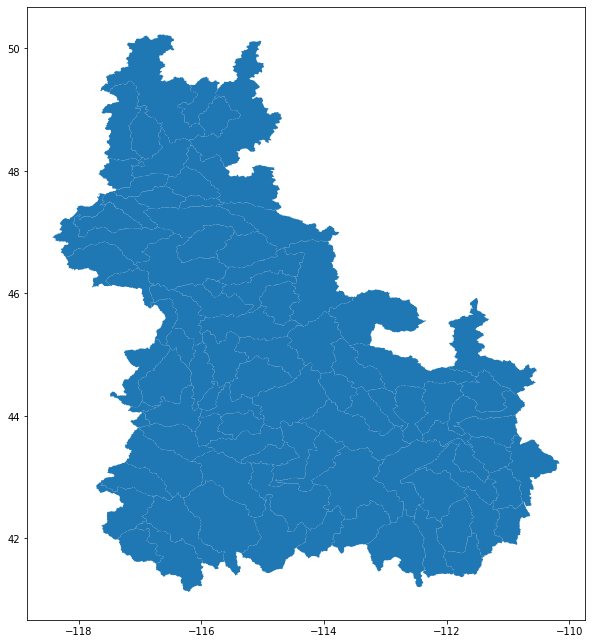

In [9]:
fig_size = (10,12)
gdf.plot(figsize=fig_size)


### Let's pick a column to display

Drill down into the data a little and see what it looks like

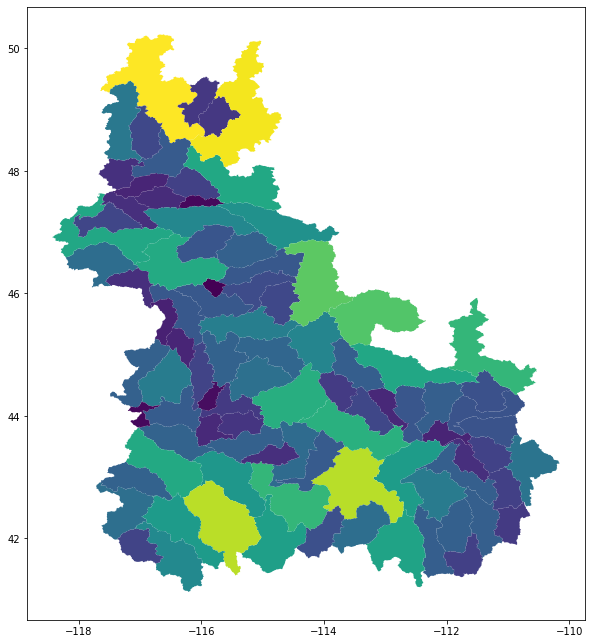

In [10]:
gdf.plot(column='AreaAcres', figsize=fig_size)

### Let's add a legend

It's always nice to know what those pretty colors mean. Adding a legend is as easy as setting the argument to True

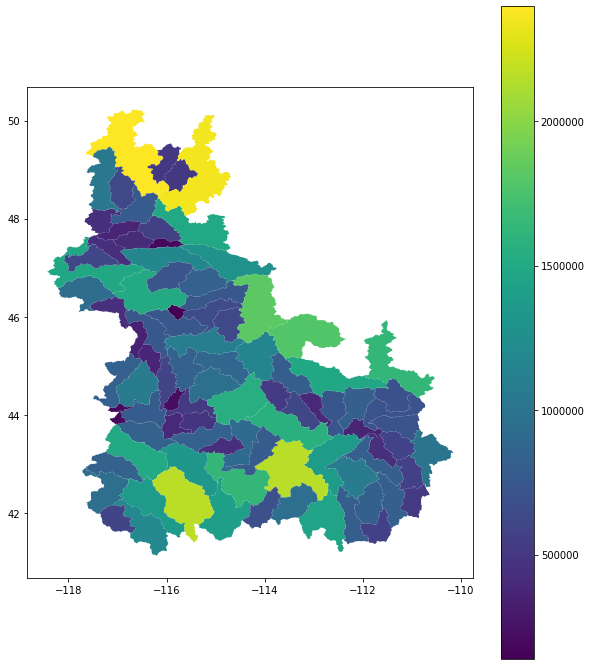

In [11]:
gdf.plot(column='AreaAcres', legend=True, figsize=fig_size)

### Uh Oh! The legend looks a little...out of proportion

Let's fix the legend with a little help from our friend, the locatable axis

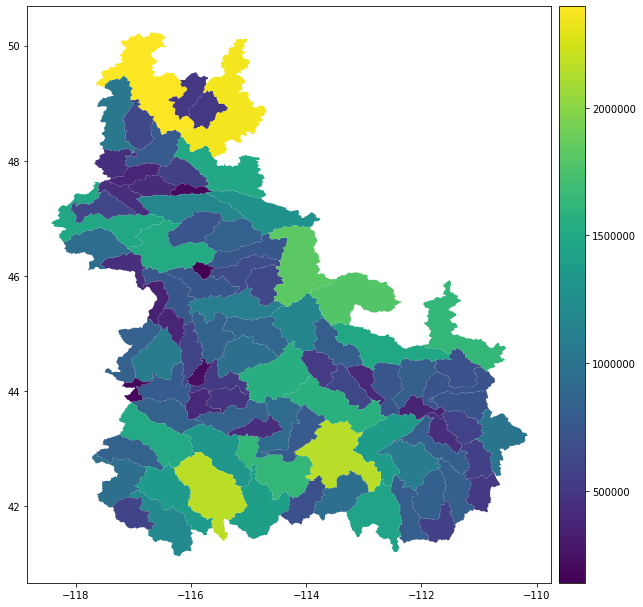

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1, figsize=fig_size)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column='AreaAcres', ax=ax, legend=True, cax=cax)

### Let's look at another shapefile

Here we have the data for bodies of water

In [13]:
shapefile2 = os.path.join('data','NHDWaterbody.shp')
gdf2 = gpd.read_file(shapefile2)
print(gdf2)

       OBJECTID Permanent_       FDate  Resolution GNIS_ID GNIS_Name  \
0             1   45095640  2002-07-12           2    None      None   
1             2   61705063  2002-11-20           2    None      None   
2             3   61705135  2002-11-20           2    None      None   
3             4   61705201  2002-11-20           2    None      None   
4             5   61704405  2002-11-20           2    None      None   
...         ...        ...         ...         ...     ...       ...   
74085     74086  131931675  2005-02-02           2    None      None   
74086     74087  131930721  2005-02-02           2    None      None   
74087     74088  132108679  2005-02-08           2    None      None   
74088     74089  132108794  2009-01-22           2    None      None   
74089     74090   43989872  2020-04-02           2    None      None   

       AreaSqKm  Elevation       ReachCode  FType  FCode  Visibility  \
0      0.001000        0.0            None    361  36100       

In [14]:
gdf2.head()

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Visibility,Shape_Leng,Shape_Area,geometry
0,1,45095640,2002-07-12,2,None,None,0.001,0.0,None,361,36100,0,0.001330,8.862037e-08,"POLYGON Z ((-112.93015 43.70359 0.00000, -112...."
1,2,61705063,2002-11-20,2,None,None,0.001,0.0,None,361,36100,0,0.001329,1.345391e-07,"POLYGON Z ((-113.75281 42.93693 0.00000, -113...."
2,3,61705135,2002-11-20,2,None,None,0.001,0.0,None,361,36100,0,0.000947,6.454160e-08,"POLYGON Z ((-113.59332 42.93119 0.00000, -113...."
3,4,61705201,2002-11-20,2,None,None,0.002,0.0,None,361,36100,0,0.001862,2.513415e-07,"POLYGON Z ((-113.48522 42.91007 0.00000, -113...."
4,5,61704405,2002-11-20,2,None,None,0.001,0.0,None,361,36100,0,0.001671,1.498874e-07,"POLYGON Z ((-113.66386 43.15951 0.00000, -113...."


### Let's use Panda's sorting and filtering to view a portion of the data

In [15]:
gdf2.loc[gdf2['AreaSqKm'] > 90].sort_values('GNIS_Name')

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Visibility,Shape_Leng,Shape_Area,geometry
16502,16503,56466309,2010-08-16,2,00397376,American Falls Reservoir,145.046000,1327.1,17040206268330,390,39009,5000000,1.845952,0.015991,"POLYGON Z ((-112.69725 43.05603 0.00000, -112...."
34463,34464,120026431,2015-12-19,2,00377174,Bear Lake,283.314504,5923.0,16010201001422,390,39009,5000000,0.866894,0.030784,"POLYGON Z ((-111.29963 42.12027 0.00000, -111...."
39555,39556,51738323,2016-08-06,2,00397563,Coeur d'Alene Lake,108.826625,647.7,17010303000465,390,39009,5000000,2.005837,0.013004,"POLYGON Z ((-116.80828 47.46404 0.00000, -116...."
11845,11846,126780698,2016-11-16,2,01441459,Great Salt Lake,3389.502116,1280.2,16020309004651,390,39009,5000000,8.373248,0.363780,"POLYGON Z ((-112.49947 40.91877 0.00000, -112...."
26615,26616,{CEAAF656-8C23-4072-80AF-4E3D9A305DFA},2010-02-17,2,-1,Kootenay Lake,422.995000,0.0,17010104145913,390,39000,5000000,4.383909,0.052648,"POLYGON Z ((-116.92400 50.17182 0.00000, -116...."
70855,70856,42401469,2017-11-30,2,00378977,Lake Cascade,101.347043,0.0,17050123000983,390,39004,5000000,2.003038,0.011487,"POLYGON Z ((-116.08709 44.63917 0.00000, -116...."
73676,73677,60176128,2014-01-06,2,00806845,Lake Koocanusa,116.851391,0.0,17010101212849,390,39004,5000000,2.433611,0.014282,"POLYGON Z ((-115.17070 48.99964 0.00000, -115...."
12677,12678,120026590,2014-02-21,2,00398523,Lake Pend Oreille,375.404366,628.5,17010214129867,390,39009,5000000,5.549297,0.045380,"POLYGON Z ((-116.38220 48.32149 0.00000, -116...."
33723,33724,51447776,2002-08-12,2,00398012,Priest Lake,94.800000,743.1,17010215000855,390,39009,5000000,1.201202,0.011556,"POLYGON Z ((-116.90899 48.53868 0.00000, -116...."


### Now we can plot just our filtered data

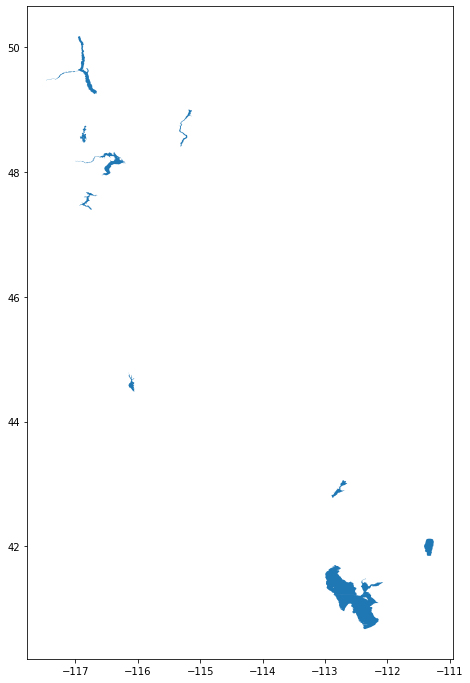

In [16]:
gdf2.loc[gdf2['AreaSqKm'] > 90].sort_values('GNIS_Name').plot(figsize=fig_size)

### Play around with the data

See if you can identify the largest body of water in the Waterbody shapefile.

### Combine Shapefiles into a single plot

With a few additions and adjustments to our previous plot code, we can add multiple shape files into one plot

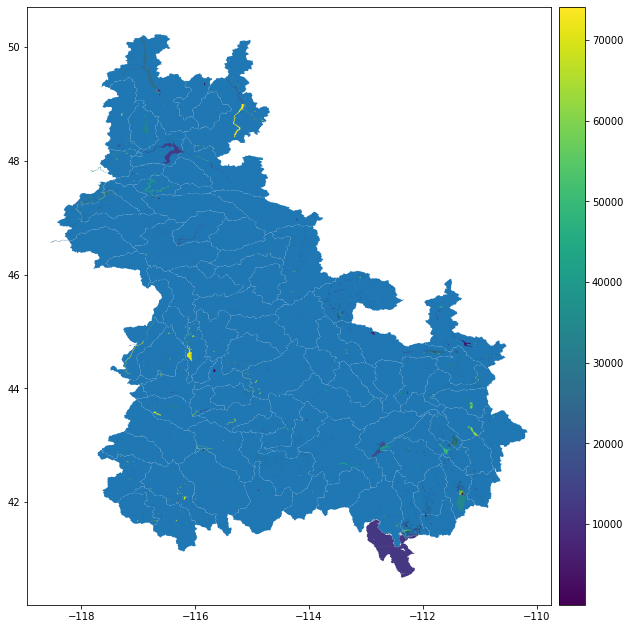

In [17]:
f, ax = plt.subplots(1, 1, figsize=fig_size)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(ax=ax)
gdf2.plot(ax=ax, column='OBJECTID', cax=cax, legend=True)
plt.show()